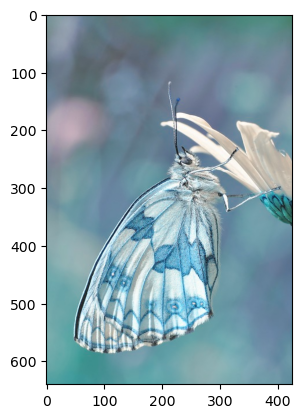

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "C:\\TrainingDataset\\trainingdata2\\raw-img"
CATEGORIES = ["butterfly", "cat", "chicken", "cow", "dog", "elephant", "horse", "sheep", "spider"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

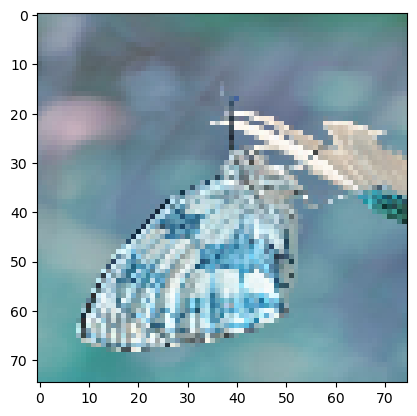

In [3]:
IMG_SIZE = 75

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [8]:
import random

random.shuffle(training_data)

In [9]:
X = []
Y = []

In [10]:
for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [11]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [12]:
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [14]:
Y = np.array(Y, dtype=np.float32)  
Y = Y.reshape(-1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y, num_classes=10)  

model = Sequential([
    Input(shape=X.shape[1:]), 
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') 
])

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

train_generator = datagen.flow(X, Y, batch_size=32, subset='training')
validation_generator = datagen.flow(X, Y, batch_size=32, subset='validation')

model.fit(train_generator, epochs=30, validation_data=validation_generator)


Epoch 1/30


C:\Users\Pratham Thakkar\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


532/532 ━━━━━━━━━━━━━━━━━━━━ 57s 102ms/step - accuracy: 0.1800 - loss: 4.1960 - val_accuracy: 0.2862 - val_loss: 1.9808
Epoch 2/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 57s 106ms/step - accuracy: 0.2774 - loss: 2.0209 - val_accuracy: 0.3535 - val_loss: 1.8428
Epoch 3/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 58s 109ms/step - accuracy: 0.3352 - loss: 1.8632 - val_accuracy: 0.3649 - val_loss: 1.7571
Epoch 4/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 58s 109ms/step - accuracy: 0.3724 - loss: 1.7572 - val_accuracy: 0.4343 - val_loss: 1.5823
Epoch 5/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 59s 111ms/step - accuracy: 0.4232 - loss: 1.6394 - val_accuracy: 0.4718 - val_loss: 1.5296
Epoch 6/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 60s 113ms/step - accuracy: 0.4530 - loss: 1.5668 - val_accuracy: 0.5110 - val_loss: 1.4148
Epoch 7/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 62s 116ms/step - accuracy: 0.4895 - loss: 1.4546 - val_accuracy: 0.5027 - val_loss: 1.4072
Epoch 8/30
532/532 ━━━━━━━━━━━━━━━━━━━━ 60s 112ms/step - accuracy: 0.4986 - loss: 1.4281 - val

In [22]:
model.save('AnimalDetectionModel.keras')